<a href="https://colab.research.google.com/github/prakashtiwari012/Stack-Overflow-case-study/blob/main/Neural_Nets_Project_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import os
#from scipy.misc import imread, imresize
from imageio import imread
from skimage.transform import resize
import datetime
import os

We set the random seed so that the results don't vary drastically.

In [ ]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive

 2929529CONSOLIDATEDREPORT01022017.pdf
 Aadhaar_card.jpg
 Bills
 CNN_assignment.zip
'Colab Notebooks'
'Copy of Data Science Interview Guide - Make A Copy If You Want To Edit.gsheet'
'Copy of Spark streaming on socket connection.gdoc'
'Copy of Spark streaming solutions.gdoc'
'Copy of Spark streaming using kafka.gdoc'
 Engagement
 Final_data
'FW_ FW_ FW_ FSM_FICCI-DHI Awareness workshop in Noida-IIT Roorkee campus..eml'
'hang in there'
 kaggle.json
'Offer Details_Prakash C Tiwari.pdf'
'One Cognizant.pdf'
 Prakash_6yrs.docx
'Prakash_DS_7yrs (1).pdf'
'Prakash_DS_7yrs (2).pdf'
 Prakash_DS_7yrs.pdf
 Prakash_Pic.jpg
 Project_data.zip
'Running Train Status - Railenquiry.in Mobile (1).pdf'
'Running Train Status - Railenquiry.in Mobile.pdf'
"somil's home.gmap"
'transmiter( my home).gmap'
'whatsapp Chat (1).zip'
'whatsapp Chat.zip'


In [ ]:
!unzip /content/gdrive/MyDrive/Project_data.zip

Streaming output truncated to the last 5000 lines.
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00050.png  
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00052.png  
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00054.png  
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00056.png  
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00058.png  
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00060.png  
 extracting: Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00062.png  
   creating: Project_data/train/WIN_20180926_17_35_12_Pro_Thumbs_Down_new/
 extracting: Project_data/train/WIN_20180926_17_35_12_Pro_Thumbs_Down_new/WIN_20180926_17_35_12_Pro_00001.png  
 extracting: Project_data/t

In [ ]:
!ls /content/Project_data/

train  train.csv  val  val.csv


In [ ]:
train_doc = np.random.permutation(open('/content/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('/content/Project_data/val.csv').readlines())
batch_size = 15  # Fillin batch size

In [ ]:
image = imread('/content/Project_data/train/WIN_20180925_18_02_41_Pro_Right_Swipe_new/WIN_20180925_18_02_41_Pro_00033.png').astype(np.float32)
if image.shape[1] == 160:
    image = image[:120, 20:140]
image=resize(image,(100,100))
image.shape


(100, 100, 3)

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [ ]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = [i for i in range(30)] #Fillin
    x=len(img_idx)
    y=100
    z=100
    while True:
        t = np.random.permutation(folder_list)
        num_batches = int(len(folder_list)/batch_size) #Fillin
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #Fillin crop the images and resize them. Note that the images are of 2 different shape 
                    if image.shape[1] == 160:
                        image = image[:120, 20:140]
                    image=resize(image,(100,100))
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255.0 # Fillin normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255.0 #Fillin  normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255.0 # Fillin normalise and feed in the image


                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        batch=num_batches-1
        if len(folder_list)%batch_size != 0:
            batch_size = len(folder_list)%batch_size
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #Fillin crop the images and resize them. Note that the images are of 2 different shape 
                    if image.shape[1] == 160:
                        image = image[:120, 20:140]
                    image=resize(image,(100,100))
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255.0 # Fillin normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255.0 #Fillin  normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255.0# Fillin normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

            


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [ ]:
curr_dt_time = datetime.datetime.now()
train_path = '/content/Project_data/train'
val_path = '/content/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 30 # Fillin choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [25]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout,LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import mobilenet_v3,mobilenet,mobilenet_v2,resnet_v2,nasnet,densenet
from keras import optimizers

In [ ]:
#write your model here
model = Sequential([
    TimeDistributed(Conv2D(16, (5,5), padding='same', activation='relu'), input_shape=(30,100,100,3)),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Conv2D(32, (3,3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Flatten()),
    LSTM(256),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(5, activation='softmax')
])

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [ ]:
optimiser =  'adam'#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 30, 100, 100, 16)  1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 100, 100, 16)  64        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 50, 50, 16)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 50, 50, 32)    4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 50, 50, 32)    128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 25, 25, 32)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 30, 25, 25, 64)    1

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [ ]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.3, verbose=1, patience=4) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [ ]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [ ]:
n_frames = 30
num_epochs = 30

In [ ]:
history=model.fit(train_generator, steps_per_epoch=steps_per_epoch, 
          epochs=num_epochs, verbose=1,callbacks=callbacks_list, 
          validation_data=val_generator,validation_steps=validation_steps, 
          class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/Project_data/train ; batch size = 15
Epoch 1/30
45/45 [==============================] - 287s 6s/step - loss: 1.3620 - categorical_accuracy: 0.4359 - val_loss: 1.8592 - val_categorical_accuracy: 0.2000

Epoch 00001: saving model to model_init_2021-09-2206_08_13.246937/model-00001-1.36203-0.43590-1.85916-0.20000.h5
Epoch 2/30
45/45 [==============================] - 73s 2s/step - loss: 1.3896 - categorical_accuracy: 0.4370 - val_loss: 2.5400 - val_categorical_accuracy: 0.1857

Epoch 00002: saving model to model_init_2021-09-2206_08_13.246937/model-00002-1.38963-0.43704-2.54002-0.18571.h5
Epoch 3/30
45/45 [==============================] - 76s 2s/step - loss: 1.4251 - categorical_accuracy: 0.4148 - val_loss: 1.9444 - val_categorical_accuracy: 0.2571

Epoch 00003: saving model to model_init_2021-09-2206_08_13.246937/model-00003-1.42510-0.41481-1.94436-0.25714.h5
Epoch 4/30
45/45 [==============================] - 72s 2s/step - loss: 1.5593 - categorical_accuracy: 0

**Final** **Project**

We tried couple of Pre trained model. But the best trade off between operation cost and accuracy seemed like Mobilenet_v2. As per following
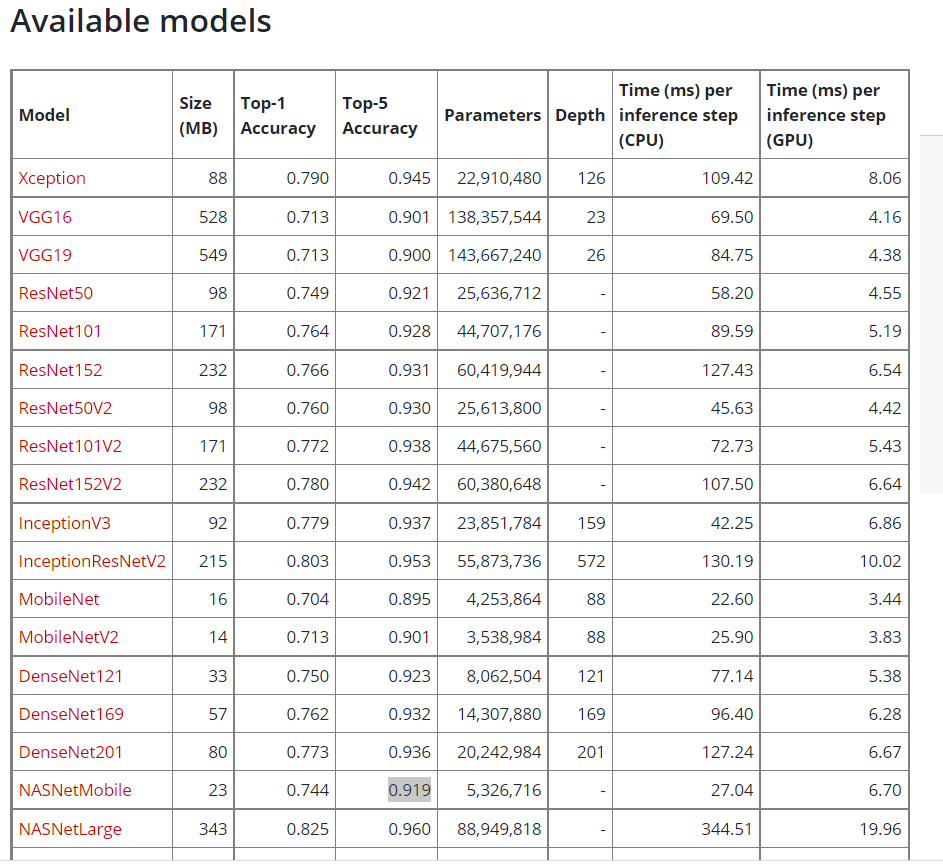

In [27]:
#write your model here
densent = densenet.DenseNet121(weights='imagenet', include_top=False)
model = Sequential([
    TimeDistributed(densent, input_shape=(30,100,100,3))
])

for layer in model.layers:
    layer.trainable = False

model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(256))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

optimiser =  'adam'#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_29 (TimeDis (None, 30, 3, 3, 1024)    7037504   
_________________________________________________________________
time_distributed_30 (TimeDis (None, 30, 3, 3, 1024)    4096      
_________________________________________________________________
time_distributed_31 (TimeDis (None, 30, 1, 1, 1024)    0         
_________________________________________________________________
time_distributed_32 (TimeDis (None, 30, 1024)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               1311744   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [28]:
n_frames = 30
num_epochs = 30

history=model.fit(train_generator, steps_per_epoch=steps_per_epoch, 
          epochs=num_epochs, verbose=1,callbacks=callbacks_list, 
          validation_data=val_generator,validation_steps=validation_steps, 
          class_weight=None, workers=1, initial_epoch=0)

Epoch 1/30
45/45 [==============================] - 94s 2s/step - loss: 1.6894 - categorical_accuracy: 0.2815 - val_loss: 1.5601 - val_categorical_accuracy: 0.3000

Epoch 00001: saving model to model_init_2021-09-2206_08_13.246937/model-00001-1.68940-0.28148-1.56012-0.30000.h5
Epoch 2/30
45/45 [==============================] - 76s 2s/step - loss: 1.5519 - categorical_accuracy: 0.2444 - val_loss: 1.3543 - val_categorical_accuracy: 0.4857

Epoch 00002: saving model to model_init_2021-09-2206_08_13.246937/model-00002-1.55194-0.24444-1.35435-0.48571.h5
Epoch 3/30
45/45 [==============================] - 67s 2s/step - loss: 1.3538 - categorical_accuracy: 0.4000 - val_loss: 1.1804 - val_categorical_accuracy: 0.5286

Epoch 00003: saving model to model_init_2021-09-2206_08_13.246937/model-00003-1.35382-0.40000-1.18043-0.52857.h5
Epoch 4/30
45/45 [==============================] - 77s 2s/step - loss: 1.2816 - categorical_accuracy: 0.4444 - val_loss: 1.2364 - val_categorical_accuracy: 0.5000

E